<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/pandas_course/12_pivot_tables/01_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# załadowuje zbiór danych
tit = sns.load_dataset('titanic')

In [52]:
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [53]:
# rozkład płci
tit.groupby('sex').size()

sex
female    314
male      577
dtype: int64

In [54]:
# to samo co powyżej
tit["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

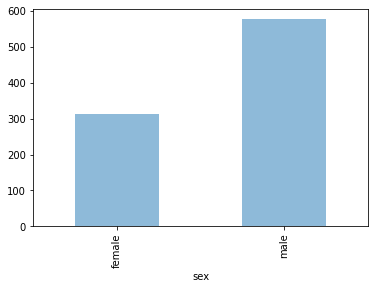

In [55]:
# alpha to przezroczystość (1 to brak)
tit.groupby('sex').size().plot(kind='bar', alpha=0.5)

In [56]:
# rozkład po płci a potem czy przeżyli
tit.groupby(['sex', 'survived']).size()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [57]:
# dokładny rozkład po płci a potem czy przeżyli
tit.groupby(['sex', 'survived']).count()

pclass  age  sibsp  parch  ...  deck  embark_town  alive  alone
sex    survived                             ...                                 
female 0             81   64     81     81  ...     6           81     81     81
       1            233  197    233    233  ...    91          231    233    233
male   0            468  360    468    468  ...    61          468    468    468
       1            109   93    109    109  ...    45          109    109    109

[4 rows x 13 columns]

In [58]:
# średnia z każdej kolumny grupowana po płci
tit.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


In [59]:
# średnia z kolumny 'survived' grupowana po płci
tit.groupby('sex').mean()['survived']

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [60]:
tit.groupby(['sex', 'class']).mean()['survived']

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [61]:
tit.groupby(['sex', 'class']).mean()['survived'].unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b0efe5c90>,
      dtype=object)

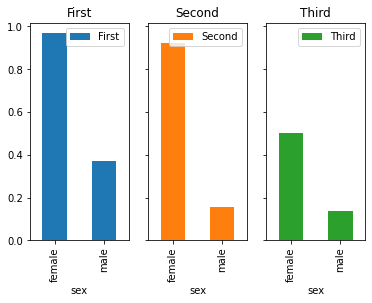

In [62]:
tit.groupby(['sex', 'class']).mean()['survived'].unstack().\
    plot(kind='bar', subplots=True, layout=(1, 3), sharey=True)

In [63]:
# to samo co: tit.groupby(['sex', 'class']).mean()['survived'].unstack()
# W pivot_table domyślnie agg_func='mean'
tit.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b0ef77190>,
      dtype=object)

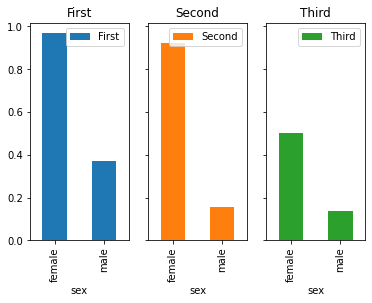

In [64]:
# ten sam wykres co powyżej
tit.pivot_table('survived', index='sex', columns='class').plot(kind='bar', subplots=True, layout=(1, 3), sharey=True)

In [65]:
tit.pivot_table(tit, index='sex', columns='class')

adult_male                      ...  survived                    
class       First    Second     Third  ...     First    Second     Third
sex                                    ...                              
female    0.00000  0.000000  0.000000  ...  0.968085  0.921053  0.500000
male      0.97541  0.916667  0.919308  ...  0.368852  0.157407  0.135447

[2 rows x 24 columns]

In [66]:
# rozkład ile jest dzieci i dorosłych
# Dodaje nową kolumnę age_bin do tit
tit['age_bin'] = pd.cut(tit['age'], bins=[0, 18, 80])
tit['age_bin'].value_counts()

(18, 80]    575
(0, 18]     139
Name: age_bin, dtype: int64

(array([113., 601.]), array([ 0, 18, 80]), <a list of 2 Patch objects>)

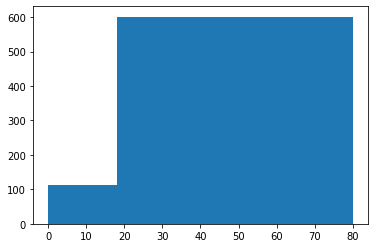

In [67]:
# wykres ile jest dzieci i dorosłych
fig, ax = plt.subplots()
ax.hist(tit["age"], bins= [0, 18, 80])

In [68]:
tit.pivot_table('survived', index='age_bin', columns='class', aggfunc='count')

class,First,Second,Third
age_bin,,,
"(0, 18]",16,29,94
"(18, 80]",170,144,261


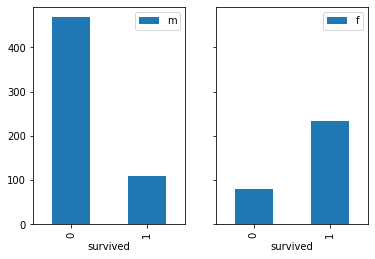

In [69]:
# %%
fig, ax = plt.subplots(1, 2, sharey=True)
tit.groupby(['sex', 'survived']).size()['male'].plot(ax=ax[0], kind='bar')
tit.groupby(['sex', 'survived']).size()['female'].plot(ax=ax[1], kind='bar')
ax[0].legend('male')
ax[1].legend('female')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b0eb21a10>,
      dtype=object)

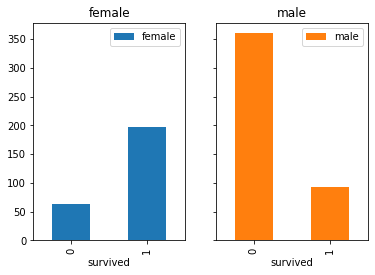

In [71]:
# to samo co powyżej ale z pivot_table
r = pd.pivot_table(tit, values='age', index='survived', columns='sex',
                   aggfunc='count')
r.plot(subplots=True, kind='bar', sharey=True, layout=(1, 2))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b0ea30510>,
      dtype=object)

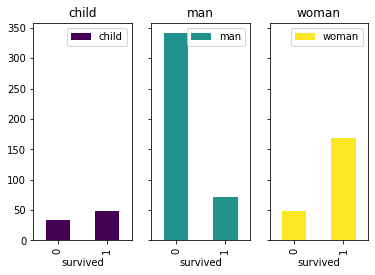

In [72]:
# %%
r = pd.pivot_table(tit, values='age', index='survived', columns='who',
                   aggfunc='count')
r.plot(subplots=True, kind='bar', sharey=True, layout=(1, 3), cmap='viridis')

In [73]:
# %%
r = pd.pivot_table(tit, values='age', index='survived', columns=['sex', 'who'],
                   aggfunc='count')
r.unstack(level=0)

sex     who    survived
female  child  0            15
               1            28
        woman  0            49
               1           169
male    child  0            19
               1            21
        man    0           341
               1            72
dtype: int64

In [76]:
# %%
age = tit['age']
age_bin = pd.cut(age, bins=[0, 18, 80])
age_bin

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [77]:
# 4 przedziały równej długości
age_qbin = pd.qcut(age, 4)
age_qbin

0       (20.125, 28.0]
1         (28.0, 38.0]
2       (20.125, 28.0]
3         (28.0, 38.0]
4         (28.0, 38.0]
            ...       
886     (20.125, 28.0]
887    (0.419, 20.125]
888                NaN
889     (20.125, 28.0]
890       (28.0, 38.0]
Name: age, Length: 891, dtype: category
Categories (4, interval[float64]): [(0.419, 20.125] < (20.125, 28.0] < (28.0, 38.0] < (38.0, 80.0]]

In [78]:
tit['qbin'] = pd.qcut(age, 4)
tit.groupby('qbin').size()

qbin
(0.419, 20.125]    179
(20.125, 28.0]     183
(28.0, 38.0]       175
(38.0, 80.0]       177
dtype: int64

In [79]:
tit.pivot_table(index='sex', columns='class',
                aggfunc={'survived': sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47